In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [2]:
# Load the dataset
House_data = pd.read_csv(r"C:\Users\HP\Documents\ML, AI and DL\housing_data.csv")

In [3]:
House_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
House_data.shape

(20640, 10)

In [5]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
House_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
#checking missing values
House_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Identify Empty Cells
# Empty cells include: blank strings (''), whitespace (' '), None, and NaN
empty_cells = House_data.isnull() | (House_data.applymap(lambda x: isinstance(x, str) and x.strip() == ''))

print("\nEmpty Cells (True = Empty):")
print(empty_cells)

# Locate Positions of Empty Cells
empty_positions = [(row, col) for row, col in zip(*np.where(empty_cells.values))]

print("\nPositions of Empty Cells (row, column):")
print(empty_positions)


Empty Cells (True = Empty):
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  hou

In [9]:
#theres a difference between empty cell and nan... if cell is empty, Imputer wont work
#Handling the empty cell in total bedrrom that prevents it from having a skew value.....
#we'll have use an imputer (i.e from sklearn.impute import SimpleImputer) to fill the missing values if it is 'NaN' values in the cell that is to be filled. but it is an empty cell in this data

value='nan'
result=House_data[House_data['total_bedrooms']==value]
print(result)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [10]:
#fill empty cells under total bedroom with mean using fillna()
x=House_data['total_bedrooms'].mean()
House_data['total_bedrooms'].fillna(x,inplace=True)

In [11]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
House_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


C:\Users\HP\AppData\Local\Temp\ipykernel_6332\146430287.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = House_data.corr()


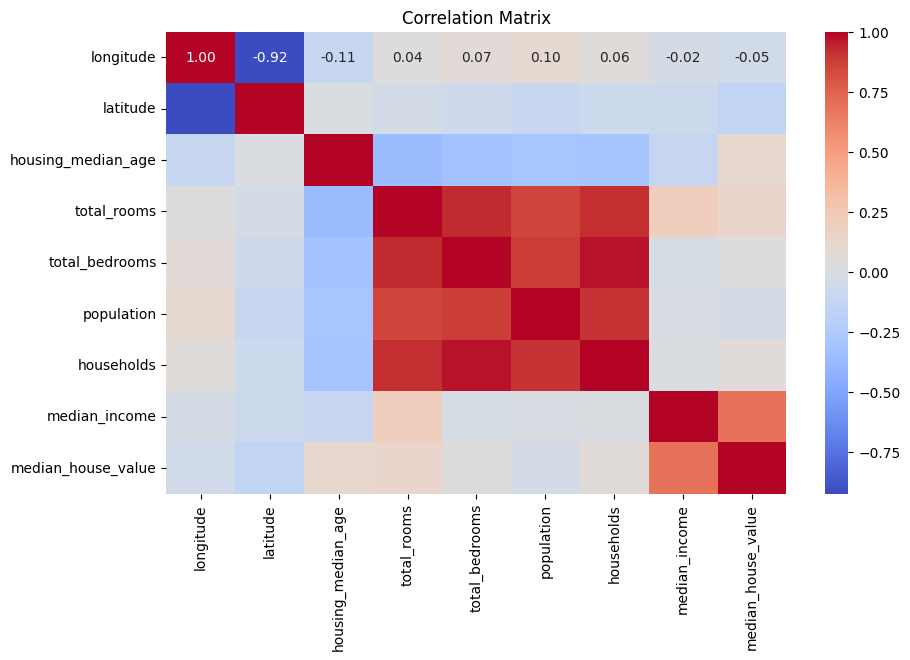

In [13]:
# Check correlation between variables
correlation_matrix = House_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [14]:
#for numerical correlation,copy the original data and drop categorical data
numeric_House_data=House_data.copy()

In [15]:
numeric_House_data.drop(['ocean_proximity'],axis=1,inplace=True)

numeric_House_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [16]:
#Encoding ocean proximity(categorical data)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
ocean_proximity_encoded = pd.DataFrame(encoder.fit_transform(
    House_data[['ocean_proximity']]).toarray())

updated_House_data = House_data.join(ocean_proximity_encoded)

updated_House_data.rename(columns = {0:'NEAR BAY',1:'1H OCEAN',2:'INLAND',3:'NEAR OCEAN',4:'ISLAND'}, inplace = True)
updated_House_data.reset_index(inplace = True)

In [17]:
updated_House_data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


In [18]:
updated_House_data.drop(['ocean_proximity'],axis=1,inplace=True)

updated_House_data

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [19]:
#splitting data into predictants(X) and target(y)
X=updated_House_data.drop(columns='median_house_value',axis=1)
y=updated_House_data['median_house_value']

In [20]:
#Seperating data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#get your train data by joining Xtrain with Y train
train_data=X_train.join(y_train)

In [22]:
#feature engineering i.e- adding descripture features with common characteristics
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_room']=train_data['total_rooms']/train_data['households']

In [23]:
train_data

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND,median_house_value,bedroom_ratio,household_room
14196,14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,0.0,0.0,0.0,0.0,1.0,103000.0,0.200576,5.017657
8267,8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,0.0,0.0,0.0,0.0,1.0,382100.0,0.232703,4.473545
17445,17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,0.0,0.0,0.0,0.0,1.0,172600.0,0.174486,5.645833
14265,14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,0.0,0.0,0.0,0.0,1.0,93400.0,0.258269,4.002817
2271,2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,0.0,1.0,0.0,0.0,0.0,96500.0,0.180940,6.268421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,1.0,0.0,0.0,0.0,0.0,229200.0,0.151128,6.129032
11964,11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,0.0,1.0,0.0,0.0,0.0,97800.0,0.184825,6.868597
5390,5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,1.0,0.0,0.0,0.0,0.0,222100.0,0.270823,3.986717
860,860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,1.0,0.0,0.0,0.0,0.0,283500.0,0.166993,6.395349


In [24]:
#split the train data back to xtrain and y train
X_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

In [25]:
#Do same or the test data
#get your test data by joining Xtrain with Y train
test_data=X_test.join(y_test)

In [26]:
#feature engineering i.e- adding descripture features with common characteristics
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_room']=test_data['total_rooms']/test_data['households']

In [27]:
test_data

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND,median_house_value,bedroom_ratio,household_room
20046,20046,-119.01,36.06,25.0,1505.0,537.870553,1392.0,359.0,1.6812,0.0,1.0,0.0,0.0,0.0,47700.0,0.357389,4.192201
3024,3024,-119.46,35.14,30.0,2943.0,537.870553,1565.0,584.0,2.5313,0.0,1.0,0.0,0.0,0.0,45800.0,0.182763,5.039384
15663,15663,-122.44,37.80,52.0,3830.0,537.870553,1310.0,963.0,3.4801,0.0,0.0,0.0,1.0,0.0,500001.0,0.140436,3.977155
20484,20484,-118.72,34.28,17.0,3051.0,537.870553,1705.0,495.0,5.7376,1.0,0.0,0.0,0.0,0.0,218600.0,0.176293,6.163636
9814,9814,-121.93,36.62,34.0,2351.0,537.870553,1063.0,428.0,3.7250,0.0,0.0,0.0,0.0,1.0,278000.0,0.228784,5.492991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,15362,-117.22,33.36,16.0,3165.0,482.000000,1351.0,452.0,4.6050,1.0,0.0,0.0,0.0,0.0,263300.0,0.152291,7.002212
16623,16623,-120.83,35.36,28.0,4323.0,886.000000,1650.0,705.0,2.7266,0.0,0.0,0.0,0.0,1.0,266800.0,0.204950,6.131915
18086,18086,-122.05,37.31,25.0,4111.0,538.000000,1585.0,568.0,9.2298,1.0,0.0,0.0,0.0,0.0,500001.0,0.130868,7.237676
2144,2144,-119.76,36.77,36.0,2507.0,466.000000,1227.0,474.0,2.7850,0.0,1.0,0.0,0.0,0.0,72300.0,0.185880,5.289030


In [28]:
#spllitthe test data back to xtest and y test
X_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [29]:
# Scale numeric features after splitting to prevent data leakage
scaler = StandardScaler()

X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [30]:
# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Cross-validation
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_s, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = -np.mean(scores)
    print(f"{name}: Mean CV MSE = {cv_results[name]}")

Linear Regression: Mean CV MSE = 4571961564.382959
Random Forest: Mean CV MSE = 2335127006.075106
Decision Tree: Mean CV MSE = 4704467032.447195
Support Vector Machine: Mean CV MSE = 14035740484.514008
Gradient Boosting: Mean CV MSE = 2957806811.660174
XGBoost: Mean CV MSE = 2229826591.846582


In [31]:
# Hyperparameter tuning for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_s, y_train)
best_gb_model = grid_search.best_estimator_

print("Best Gradient Boosting Parameters:", grid_search.best_params_)


Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


In [32]:
# Evaluate Gradient Boosting
best_gb_model.fit(X_train_s, y_train)
y_pred = best_gb_model.predict(X_test_s)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Gradient Boosting - Test MSE: {mse}, Test MAE: {mae}")



Gradient Boosting - Test MSE: 2213459061.162547, Test MAE: 30656.21253081192


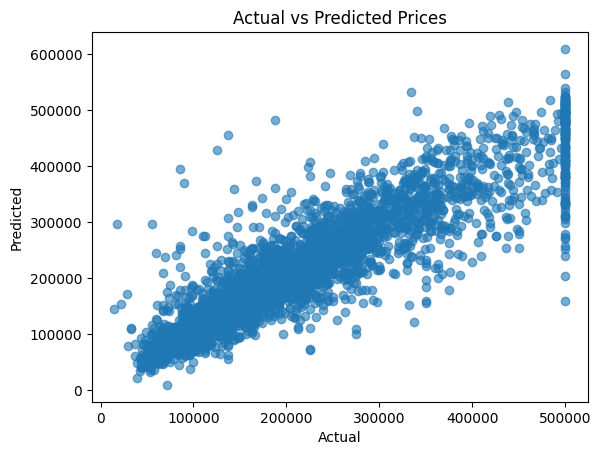

In [33]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Prices")
plt.show()

In [34]:
# Feature importance using Random Forest
# Step 1: Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_s, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Step 2: Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Step 3: Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Step 4: Select important features using a threshold
selector = SelectFromModel(rf_model, threshold='mean')  # Select features with importance >= mean
X_train_selected = selector.transform(X_train_s)
X_test_selected = selector.transform(X_test_s)

print(f"\nNumber of Selected Features: {X_train_selected.shape[1]}")

# Optional: Retrain the model with selected features
rf_model_selected = RandomForestRegressor(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)


Feature Importances:
               Feature  Importance
8        median_income    0.479528
10            1H OCEAN    0.140888
0                index    0.083705
1            longitude    0.068003
2             latitude    0.057634
3   housing_median_age    0.044902
14       bedroom_ratio    0.031107
15      household_room    0.024406
6           population    0.019612
4          total_rooms    0.014399
5       total_bedrooms    0.013640
7           households    0.011698
9             NEAR BAY    0.005757
13              ISLAND    0.003735
12          NEAR OCEAN    0.000830
11              INLAND    0.000156

Number of Selected Features: 4


RandomForestRegressor(random_state=42)

In [36]:
# Step 5: Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = rf_model_selected.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nModel Performance with Selected Features:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Model Performance with Selected Features:
Mean Squared Error: 2347219033.1926184
Mean Absolute Error: 30800.898374515506


In [38]:
# we"ll duplicate the X, y data cos we want to also use pipeline to build our model and find best estimators

New_X=X.copy()
New_y=y.copy()

In [39]:
New_X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0


In [40]:
#Seperating data into train and test
New_X_train,New_X_test,New_y_train,New_y_test=train_test_split(New_X,New_y,test_size=0.2)

In [41]:
# Handle missing values and scaling
numeric_features = New_X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

# Imputer for missing values
imputer = SimpleImputer(strategy='median')

# Create a pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler)
])

# Apply preprocessing to the dataset
X_train_processed = pipeline.fit_transform(New_X_train[numeric_features])
X_test_processed = pipeline.transform(New_X_test[numeric_features])

In [42]:
# Train different regression models and perform cross-validation

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Perform cross-validation for each model
cv_results = {}
for name, model in models.items():
    score = cross_val_score(model, X_train_processed, New_y_train, cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = np.mean(score)
    print(f"{name} - Mean CV MSE: {cv_results[name]}")


Linear Regression - Mean CV MSE: -4739185801.508772
Random Forest - Mean CV MSE: -2290308934.718585
Decision Tree - Mean CV MSE: -4411608050.434709
Support Vector Machine - Mean CV MSE: -14118699382.997843
Gradient Boosting - Mean CV MSE: -2934004803.719661
XGBoost - Mean CV MSE: -2274667992.9096155


In [43]:
# Hyperparameter Tuning using GridSearchCV for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_processed, New_y_train)

print(f"Best parameters for Gradient Boosting: {grid_search.best_params_}")

# Train the best model (Gradient Boosting) with the optimal hyperparameters
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train_processed, New_y_train)

Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)

Test Mean Squared Error: 24444648215.034206
Test Mean Absolute Error: 121216.36168180563


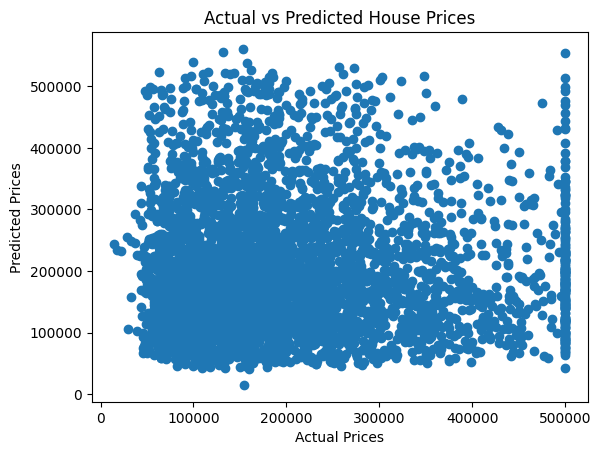

In [44]:
# Evaluate on test data
y_pred = best_gb_model.predict(X_test_processed)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")
print(f"Test Mean Absolute Error: {mae}")

# Plot the predicted vs actual house prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [53]:
# MSE of the data still high, research on other means like regularization etc to reduce it